# Task 2: Regression with Neural Network

*In this notebook I am going to utilize neural networks to implement a regression analyser for the boston house prices data set.*

---

### Init data

In [1]:
# Load boston housing data
# Create a neural network model
# Train the model
# Evaluate the model's performance
# Predict housing prices based on a feature set

# Import required libraries
import tensorflow as tf
# import boston housing data from keras datasets
from tensorflow.keras.datasets import boston_housing

2023-11-27 13:25:22.584335: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


*Load the data*

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(path='boston_housing.npz')

---
### Regression with `MLPRegressor` from scikit-learn

In [86]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

*Regularizing the data for the analysis*

In [87]:
# Regularizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
# Using GridSearchCV to find a suggestion for the best parameters
parameters = {'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100), (100,)],
                'activation': ['relu', 'tanh', 'logistic'],
                'solver': ['sgd', 'adam', 'lbfgs'],
                'alpha': [1e-4, 1e-3, 1e-2],
                'learning_rate': ['constant', 'adaptive']}
# Create a base model
mlp = MLPRegressor(max_iter=1000)

# Create a grid search model
clf = GridSearchCV(mlp, parameters, n_jobs=-1)

# Train the model
clf.fit(x_train, y_train)

/Users/sindreoyen/Desktop/Sevilla/Aprendizaje Automatico/Excercises/Python-MachineLearning/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sindreoyen/Desktop/Sevilla/Aprendizaje Automatico/Excercises/Python-MachineLearning/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sin

GridSearchCV(estimator=MLPRegressor(max_iter=1000), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam', 'lbfgs']})

In [15]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'solver': 'sgd'}


Best parameters found:
 {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'solver': 'sgd'}


For this MLPRegressor we are thus using the ReLU rectifier for the activation function - which is the recommended for the hidden layers. In this implementation we are using three hidden layers with 100 neurons in each. The solver is using a SGD (stochastic gradient descent) approach, which means that for the loss function we are calculating the gradient to find the minimum of the loss function by moving in the direction of the steepest descent as defined by the negative of the gradient.

In [101]:
best_params = {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'solver': 'sgd'}

# Create a model with the best parameters
mlp = MLPRegressor(**best_params, max_iter=1000, verbose=True, random_state=42, early_stopping=True)

# Train the model
mlp.fit(x_train, y_train)

Iteration 1, loss = 304.73461079
Validation score: -6.122777
Iteration 2, loss = 278.94281431
Validation score: -4.948449
Iteration 3, loss = 227.92601601
Validation score: -2.281743
Iteration 4, loss = 113.67824487
Validation score: 0.134488
Iteration 5, loss = 47.10885273
Validation score: -0.253042
Iteration 6, loss = 28.48971386
Validation score: 0.483816
Iteration 7, loss = 15.36976406
Validation score: 0.619775
Iteration 8, loss = 13.28468943
Validation score: 0.694051
Iteration 9, loss = 12.23928069
Validation score: 0.741251
Iteration 10, loss = 11.16357412
Validation score: 0.778249
Iteration 11, loss = 9.70290434
Validation score: 0.798637
Iteration 12, loss = 8.32893666
Validation score: 0.802235
Iteration 13, loss = 7.76723372
Validation score: 0.798969
Iteration 14, loss = 7.47771110
Validation score: 0.800159
Iteration 15, loss = 7.13326617
Validation score: 0.805709
Iteration 16, loss = 6.70108663
Validation score: 0.814943
Iteration 17, loss = 6.33989857
Validation scor

MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 100, 100),
             max_iter=1000, random_state=42, solver='sgd', verbose=True)

In [102]:
# Score the model
print(f"Training score: {mlp.score(x_train, y_train)}")
print(f"Testing score: {mlp.score(x_test, y_test)}")

Training score: 0.9182024105227515
Testing score: 0.752588485995952


In [114]:
# Plot the models guesses vs the actual results
import matplotlib.pyplot as plt
import numpy as np

def display_regression(model, title: str):
    y_pred = model.predict(x_test)

    plt.scatter(y_test, y_pred)
    plt.title(title)
    plt.plot([0, 50], [0, 50], '--k')
    plt.axis('tight')
    plt.xlabel('True price ($1000s)')
    plt.ylabel('Predicted price ($1000s)')
    plt.tight_layout()
    plt.show()

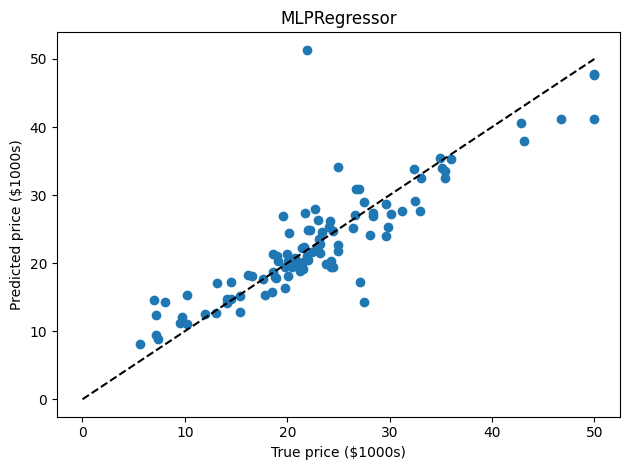

In [115]:
display_regression(mlp, "MLPRegressor")

---
### Regression with `Sequential` from Keras

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

In [61]:
architectures = [
    [Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001), input_shape=(x_train.shape[1],)),
        Dropout(0.5),
        Dense(64, kernel_regularizer=regularizers.l1(0.001), activation='relu'),
        Dropout(0.5),
        Dense(32, kernel_regularizer=regularizers.l1(0.001), activation='relu'),
        Dense(1, activation='linear')
     ],
    # Changed regularizer to l2
    [Dense(128, activation='linear', kernel_regularizer=regularizers.l2(0.001), input_shape=(x_train.shape[1],)),
        Dropout(0.3),
        Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        Dropout(0.3),
        Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        Dense(1, activation='linear')
    ],
    # Changed hidden layer structure
    [Dense(80, activation='linear', kernel_regularizer=regularizers.l2(0.001), input_shape=(x_train.shape[1],)),
        Dropout(0.3),
        Dense(100, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        Dropout(0.3),
        Dense(100, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
        Dense(1, activation='linear')
    ],
    # Changed hidden layer structure
    [Dense(80, activation='linear', kernel_regularizer=regularizers.l2(0.001), input_shape=(x_train.shape[1],)),
        Dropout(0.3),
        Dense(100, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
        Dropout(0.3),
        Dense(100, kernel_regularizer=regularizers.l2(0.01), activation='relu'),
        Dropout(0.3),
        Dense(1, activation='linear')
    ],
]

In [62]:
model = Sequential(architectures[2])

Trying with different implementations, using the mean squared error loss function for the regression with the adam optimizer.

In [63]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 80)                1120      
                                                                 
 dropout_30 (Dropout)        (None, 80)                0         
                                                                 
 dense_57 (Dense)            (None, 100)               8100      
                                                                 
 dropout_31 (Dropout)        (None, 100)               0         
                                                                 
 dense_58 (Dense)            (None, 100)               10100     
                                                                 
 dense_59 (Dense)            (None, 1)                 101       
                                                                 
Total params: 19421 (75.86 KB)
Trainable params: 19421

In [108]:
model.fit(x_train, y_train, epochs=1000, batch_size=32, verbose=1, validation_data=(x_test, y_test))

Epoch 1/1000
404/404 [==============================] - 1s 2ms/step - loss: 52.0831 - mse: 51.6703 - mae: 4.5436 - val_loss: 42.8866 - val_mse: 42.4753 - val_mae: 4.5625
Epoch 2/1000
404/404 [==============================] - 0s 1ms/step - loss: 27.0353 - mse: 26.6253 - mae: 3.3768 - val_loss: 33.0529 - val_mse: 32.6423 - val_mae: 3.6575
Epoch 3/1000
404/404 [==============================] - 1s 1ms/step - loss: 29.6789 - mse: 29.2707 - mae: 3.5044 - val_loss: 25.0749 - val_mse: 24.6670 - val_mae: 3.2906
Epoch 4/1000
404/404 [==============================] - 0s 1ms/step - loss: 20.7811 - mse: 20.3729 - mae: 2.9685 - val_loss: 31.2964 - val_mse: 30.8886 - val_mae: 3.6653
Epoch 5/1000
404/404 [==============================] - 0s 1ms/step - loss: 20.5200 - mse: 20.1125 - mae: 3.0082 - val_loss: 30.2050 - val_mse: 29.7972 - val_mae: 3.8310
Epoch 6/1000
404/404 [==============================] - 1s 1ms/step - loss: 19.8734 - mse: 19.4653 - mae: 2.9676 - val_loss: 19.5888 - val_mse: 19.179

In [109]:
model.evaluate(x_test, y_test, verbose=1)

4/4 [==============================] - 0s 2ms/step - loss: 18.6399 - mse: 17.9797 - mae: 2.9846


[18.639904022216797, 17.979656219482422, 2.984588623046875]

4/4 [==============================] - 0s 4ms/step


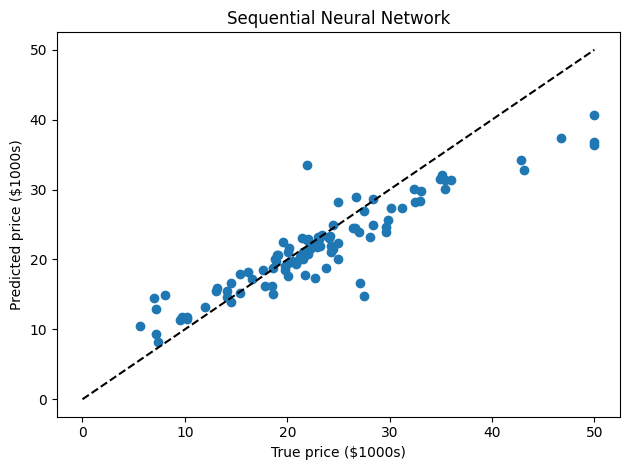

In [110]:
display_regression(model, "Sequential Neural Network")

4/4 [==============================] - 0s 1ms/step


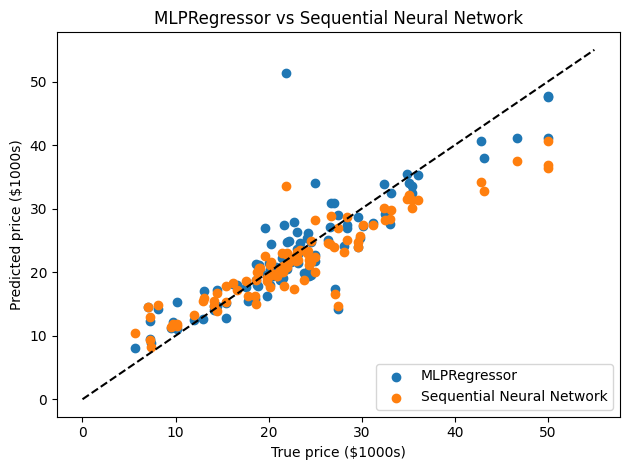

In [117]:
# Display the mlp and sequential neural network side by side
y_pred = mlp.predict(x_test)
y_pred2 = model.predict(x_test)

plt.scatter(y_test, y_pred, label='MLPRegressor')
plt.scatter(y_test, y_pred2, label='Sequential Neural Network')

plt.title("MLPRegressor vs Sequential Neural Network")
plt.plot([0, 55], [0, 55], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
plt.legend()
plt.show()

As you can see by the graph above, we have been able to receive quite similar results from the Sequential Neural Network and the MLPRegressor. The MLPRegressor with it's current settings appears to be more vulnerable to the large deviations, whilst the Sequential appears to in general have more deviations further out than the MLPRegressor.